In [16]:
import cv2
import numpy as np
import csv
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers import Convolution2D
from keras.optimizers import Adam
%matplotlib inline
from matplotlib import gridspec

(160, 320, 3)
(160, 320, 3)
(160, 320, 3)
crop_right shape (65, 320, 3)
crop_center shape (65, 320, 3)
crop_left shape (65, 320, 3)


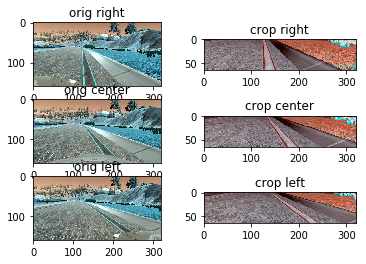

In [12]:
import os

img_path = '/Users/dc/Desktop/'

img_right = cv2.imread(img_path+'data/IMG/right_2017_03_14_15_04_02_688.jpg')
img_center = cv2.imread(img_path+'data/IMG/center_2017_03_14_15_04_02_688.jpg')
img_left = cv2.imread(img_path+'data/IMG/left_2017_03_14_15_04_02_688.jpg')

#70 pixels from top, 25 from bottom, 0,0 from right/left
#crop_img = img[:, :, 70:-25, 0:0]
img_np_right = np.array(img_right).astype('float32')
img_np_center = np.array(img_center).astype('float32')
img_np_left = np.array(img_left).astype('float32')

print(img_np_right.shape)
print(img_np_center.shape)
print(img_np_left.shape)

img_crop_right = img_np_right[70:-25,:,:]
print ('crop_right shape', img_crop_right.shape)

img_crop_center = img_np_center[70:-25,:,:]
print ('crop_center shape', img_crop_center.shape)

img_crop_left = img_np_left[70:-25,:,:]
print ('crop_left shape', img_crop_left.shape)

gs1 = gridspec.GridSpec(3, 2)
gs1.update(wspace=5.0, hspace= 5.0)
plt.subplot(3,2,1)
plt.imshow(img_right)
plt.title('orig right')
plt.subplot(3,2,2)
plt.imshow(img_crop_right)
plt.title('crop right')

plt.subplot(3,2,3)
plt.imshow(img_center)
plt.title('orig center')
plt.subplot(3,2,4)
plt.imshow(img_crop_center)
plt.title('crop center')

plt.subplot(3,2,5)
plt.imshow(img_left)
plt.title('orig left')
plt.subplot(3,2,6)
plt.imshow(img_crop_left)
plt.title('crop left')


In [14]:

lines = []

numZero = 0

img_path = '/Users/dc/Desktop/'

with open(img_path + 'data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        #add only if speed > 1.0
        if(float(line[6]) > 1.0):
            lines.append(line)

images = []
measurements = []
for line in lines:
    filename_center = line[0].split('/')[-1]
    filename_left = line[1].split('/')[-1]
    filename_right = line[2].split('/')[-1]
    #print(filename_center)
    #print(filename_left)
    #print(filename_right)
    center_file = img_path + 'data/IMG/' + filename_center
    left_file = img_path + 'data/IMG/' + filename_left
    right_file = img_path + 'data/IMG/' + filename_right
    
    center_image = cv2.imread(center_file)
    left_image = cv2.imread(left_file)
    right_image = cv2.imread(right_file)
    
    images.extend([center_image,left_image,right_image])
    measurements.extend([float(line[3]),0.2,-0.2])

print (len(images))
X_train = np.array(images)
#X_train = X_train.astype('float32')
y_train = np.array(measurements)

input_shape = X_train.shape
print(input_shape, 'input shape')


from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda
from keras.optimizers import Adam

model = Sequential() 
model.add(Lambda(lambda x: x / 255. - 0.5, input_shape=(160,320,3)))
model.add(Flatten())
model.add(Dense(1))
adam = Adam(lr=0.0001)
model.compile(loss='mse', optimizer = adam)

history = model.fit(X_train, y_train,  verbose=2, validation_split=0.2, shuffle=True)

model.save('model.h5')

5739
(5739, 160, 320, 3) input shape
Train on 4591 samples, validate on 1148 samples
Epoch 1/10
5s - loss: 0.0617 - val_loss: 0.0787
Epoch 2/10
5s - loss: 0.0441 - val_loss: 0.0431
Epoch 3/10
5s - loss: 0.0285 - val_loss: 0.0465
Epoch 4/10
5s - loss: 0.0279 - val_loss: 0.0426
Epoch 5/10
5s - loss: 0.0349 - val_loss: 0.0677
Epoch 6/10
5s - loss: 0.0531 - val_loss: 0.0806
Epoch 7/10
5s - loss: 0.0582 - val_loss: 0.0864
Epoch 8/10
5s - loss: 0.0570 - val_loss: 0.0690
Epoch 9/10
5s - loss: 0.0515 - val_loss: 0.0522
Epoch 10/10
5s - loss: 0.0532 - val_loss: 0.0696


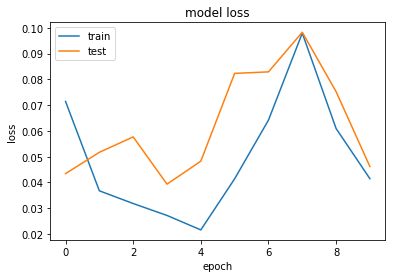

In [9]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
# with augmented data; 3 cameras

from keras.layers.convolutional import Convolution2D

path = '/Users/dc/Desktop/'

lines = []
lines1 = []
lines2= []
lines3 = []
with open(path + 'data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        if(float(line[6]) > 1.0):
            lines.append(line)

with open(path + 'recovery/driving_log1.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        if(float(line[6]) > 1.0):
            lines1.append(line)
            
with open(path + 'recovery/driving_log2.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        if(float(line[6]) > 1.0):
            lines2.append(line)

with open(path + 'recovery/driving_log3.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        if(float(line[6]) > 1.0):
            lines3.append(line)
            
            
images = []
measurements = []


for line in lines:
    filename_center = line[0].split('/')[-1]
    filename_left = line[1].split('/')[-1]
    filename_right = line[2].split('/')[-1]
    center_file = path + 'data/IMG/' + filename_center
    left_file = path + 'data/IMG/' + filename_left
    right_file = path + 'data/IMG/' + filename_right
    
    center_image = cv2.imread(center_file)
    left_image = cv2.imread(left_file)
    right_image = cv2.imread(right_file)
    
    images.extend([center_image,left_image,right_image])
    measurements.extend([float(line[3]),0.25,-0.25])


    
    
    

print ('len images:',len(images))
print ('len measurements:', len(measurements))
#X_train = np.array(images)
#X_train = X_train.astype('float32')
#y_train = np.array(measurements)



from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda,Cropping2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import Adam

augmented_images, augmented_measurements = [],[]
for image,measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(cv2.flip(image,1))
    augmented_measurements.append(-1.0*measurement)
    
print('num augmented images:', len(augmented_images))
X_train = np.array(augmented_images)
#X_train = X_train.astype('float32')
y_train = np.array(augmented_measurements)

print('X_train shape', X_train.shape, 'y_train shape', y_train.shape)
print ('X_train type:', type(X_train))

model = Sequential()
model.add(Lambda(lambda x: x / 255. - 0.5, input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((70,25),(0,0))))#is validation cropped?
model.add(Convolution2D(24,5,5,subsample=(2,2),activation='relu'))
model.add(Convolution2D(36,5,5,subsample=(2,2),activation='relu'))
model.add(Convolution2D(48,5,5,subsample=(2,2),activation='relu'))
model.add(Convolution2D(64,3,3,activation='relu'))
model.add(Convolution2D(64,3,3,activation='relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

adam = Adam(lr=0.0001)
model.compile(loss='mse', optimizer = adam)

history = model.fit(X_train, y_train, validation_split=0.2, shuffle=True)
model.save('model_crop.h5')
print('model saved')

len images: 5739
len measurements: 5739
num augmented images: 11478
X_train shape (11478, 160, 320, 3) y_train shape (11478,)
X_train type: <class 'numpy.ndarray'>
Train on 9182 samples, validate on 2296 samples
Epoch 1/10
9182/9182 [==============================] - 108s - loss: 0.0182 - val_loss: 0.0382

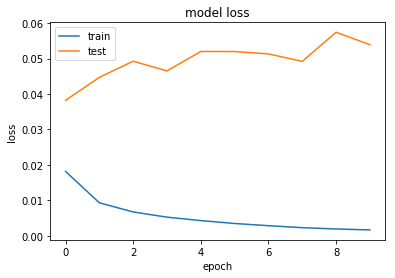

In [17]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [4]:

import os
import csv
import cv2
import numpy as np
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

path = '/Users/dc/Desktop/'
samples = []
with open(path + 'data/driving_log4laps.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)
        
        
#we lost the augmentes images...and teh 3 cameras

train_samples, validation_samples = train_test_split(samples, test_size=0.2)
print ('num samples:', len(samples))
print ('num train_samples:',len(train_samples))
print ('num validation_samples:',len(validation_samples))

def generator(samples, batch_size=32):
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]
            images = []
            angles = []
            for batch_sample in batch_samples:
                name_center = path + 'data/IMG_4laps/'+batch_sample[0].split('/')[-1]
                name_left = path + 'data/IMG_4laps/'+batch_sample[1].split('/')[-1]
                name_right = path + 'data/IMG_4laps/'+batch_sample[2].split('/')[-1]
                
                #print ('name:',name)
                center_image = cv2.imread(name_center)
                left_image = cv2.imread(name_left)
                right_image = cv2.imread(name_right)
                
                #print(type(center_image))
                #print(center_image[60:-20,:,:].shape)
                center_angle = float(batch_sample[3])
                
                images.append(center_image[60:-20,:,:])
                angles.append(center_angle)
                
                images.append(right_image[60:-20,:,:])
                angles.append(right_angle)
                
                images.append(left_image[60:-20,:,:])
                angles.append(left_angle)
                

            # trim image to only see section with road
            
            X_train = np.array(images)
            y_train = np.array(angles)
            print('X_train shape:', X_train.shape, 'y_train shape:', y_train.shape)
            yield sklearn.utils.shuffle(X_train, y_train)

# compile and train the model using the generator function
train_generator = generator(train_samples, batch_size=32)
validation_generator = generator(validation_samples, batch_size=32)

ch, row, col = 3, 80, 320  # Trimmed image format

model = Sequential()
# Preprocess incoming data, centered around zero with small standard deviation 
model.add(Lambda(lambda x: x/127.5 - 1.,
        input_shape=(row, col,ch),
        output_shape=(row, col,ch)))
model.add(Convolution2D(24,5,5,subsample=(2,2),activation='relu'))
model.add(Convolution2D(36,5,5,subsample=(2,2),activation='relu'))
model.add(Convolution2D(48,5,5,subsample=(2,2),activation='relu'))
model.add(Convolution2D(64,3,3,activation='relu'))
model.add(Convolution2D(64,3,3,activation='relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))


model.compile(loss='mse', optimizer='adam')
history = model.fit_generator(train_generator, samples_per_epoch= len(train_samples), 
                    validation_data=validation_generator, 
                    nb_val_samples=len(validation_samples), nb_epoch=10)

model.save('model_batch.h5')
print (model.summary())

num samples: 10978
num train_samples: 8782
num validation_samples: 2196


NameError: name 'Convolution2D' is not defined